In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# !pip install gensim

In [5]:
#!pip install scipy==1.10.1

In [6]:
import re
from collections import Counter
import scipy.stats as stats
from gensim.models import Word2Vec

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.utils.class_weight import compute_class_weight

In [9]:
!pip install prophet

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import xgboost as xgb

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM,Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
from prophet import Prophet

In [13]:
from tensorflow.keras.models import load_model

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
Dataset = pd.read_csv('/content/drive/MyDrive/Project_8/all_upwork_jobs_Dataset.csv')

In [16]:
Dataset.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


In [17]:
Dataset.shape

(244828, 8)

In [18]:
Dataset.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

In [19]:
Dataset.info

<bound method DataFrame.info of                                                     title  \
0       Experienced Media Buyer For Solar Pannel and R...   
1                                    Full Stack Developer   
2                                         SMMA Bubble App   
3                  Talent Hunter Specialized in Marketing   
4                                           Data Engineer   
...                                                   ...   
244823  Need Facebook advertising experts to launch pr...   
244824          Digital/Telemarketing/Sales/OutSide Sales   
244825                           WordPress Template Edits   
244826            ELEMENTOR PRO For quick fix (Wordpress)   
244827              Creating a UGC Ad for Our Mobile Game   

                                                     link  \
0       https://www.upwork.com/jobs/Experienced-Media-...   
1       https://www.upwork.com/jobs/Full-Stack-Develop...   
2       https://www.upwork.com/jobs/SMMA-Bubble-App_%7...   
3       https://www.upwork.com/jobs/Talent-Hunter-Spec...   
4       https://www.upwork.com/jobs/Data-Engineer_%7E0...   
...                                                   ...   
244823  https://www.upwork.com/jobs/Need-Facebook-adve...   
244824  https://www.upwork.com/jobs/Digital-Telemarket...   
244825  https://www.upwork.com/jobs/WordPress-Template...   
244826  https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...   
244827  https://www.upwork.com/jobs/Creating-UGC-for-O...   

                   published_date  is_hourly  hourly_low  hourly_high  budget  \
0       2024-02-17 09:09:54+00:00      False         NaN          NaN   500.0   
1       2024-02-17 09:09:17+00:00      False         NaN          NaN  1100.0   
2       2024-02-17 09:08:46+00:00       True        10.0         30.0     NaN   
3       2024-02-17 09:08:08+00:00       True         NaN          NaN     NaN   
4       2024-02-17 09:07:42+00:00      False         NaN          NaN   650.0   
...                           ...        ...         ...          ...     ...   
244823  2024-03-24 13:28:38+00:00       True        20.0        100.0     NaN   
244824  2024-03-24 13:40:52+00:00      False         NaN          NaN   100.0   
244825  2024-03-24 13:37:50+00:00       True         5.0         30.0     NaN   
244826  2024-03-24 13:52:15+00:00      False         NaN          NaN    15.0   
244827  2024-03-24 13:53:00+00:00      False         NaN          NaN    50.0   

              country  
0                 NaN  
1       United States  
2       United States  
3       United States  
4               India  
...               ...  
244823         Zambia  
244824      Sri Lanka  
244825  United States  
244826         France  
244827         Israel  

[244828 rows x 8 columns]>

In [20]:
Dataset.dtypes

,0
title,object
link,object
published_date,object
is_hourly,bool
hourly_low,float64
hourly_high,float64
budget,float64
country,object


In [21]:
desc = Dataset.describe()

In [22]:
desc

,hourly_low,hourly_high,budget
count,102422.000000,98775.000000,103891.000000
mean,17.339644,41.970610,911.473564
std,18.140065,47.850892,15729.738834
min,3.000000,3.000000,5.000000
25%,8.000000,20.000000,25.000000
50%,15.000000,30.000000,100.000000
75%,20.000000,50.000000,300.000000
max,998.000000,999.000000,1000000.000000


In [23]:
# Plot each numeric column separately for better clarity

numeric_columns = ['hourly_low', 'hourly_high', 'budget']

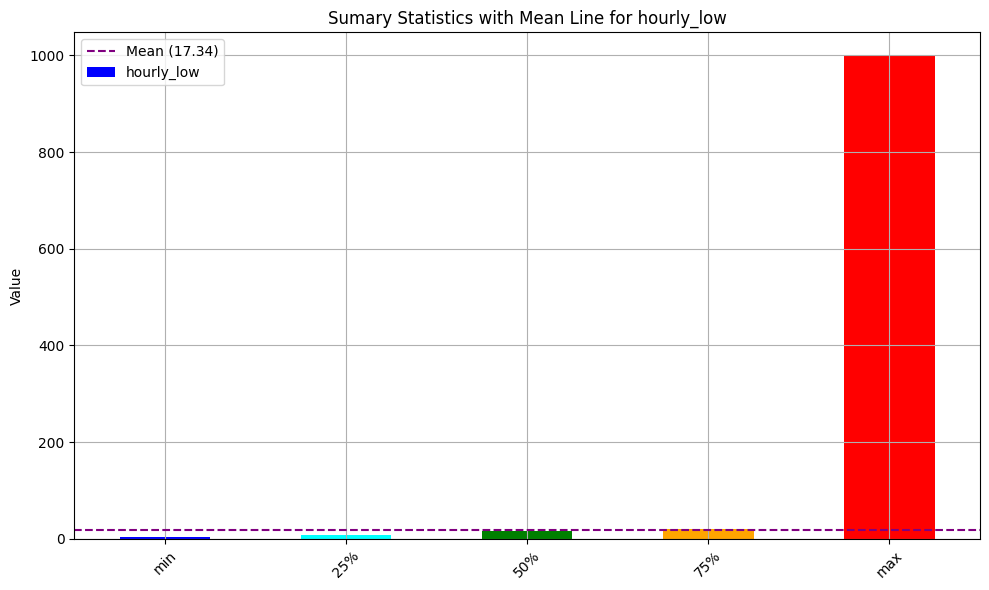

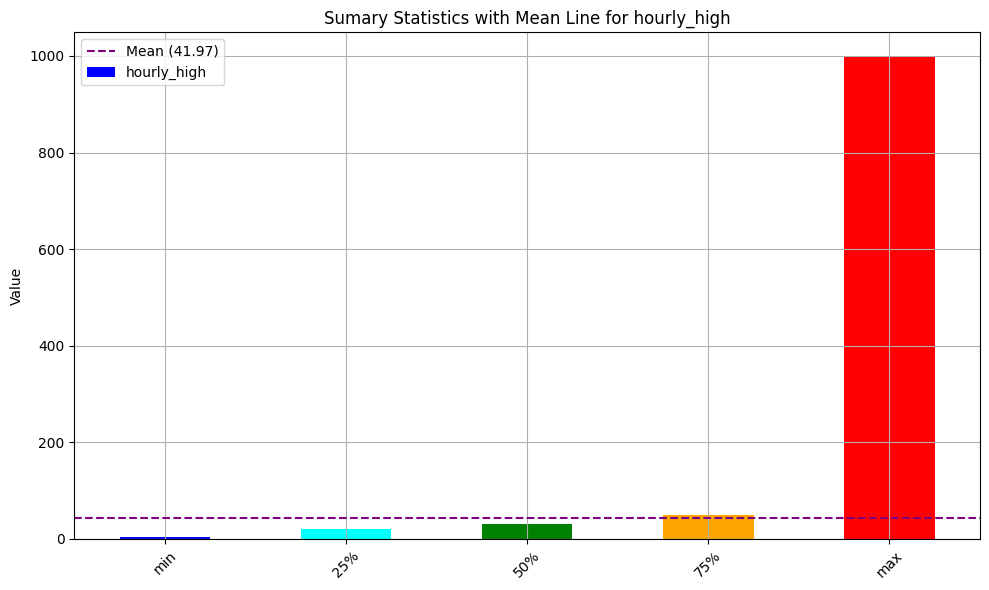

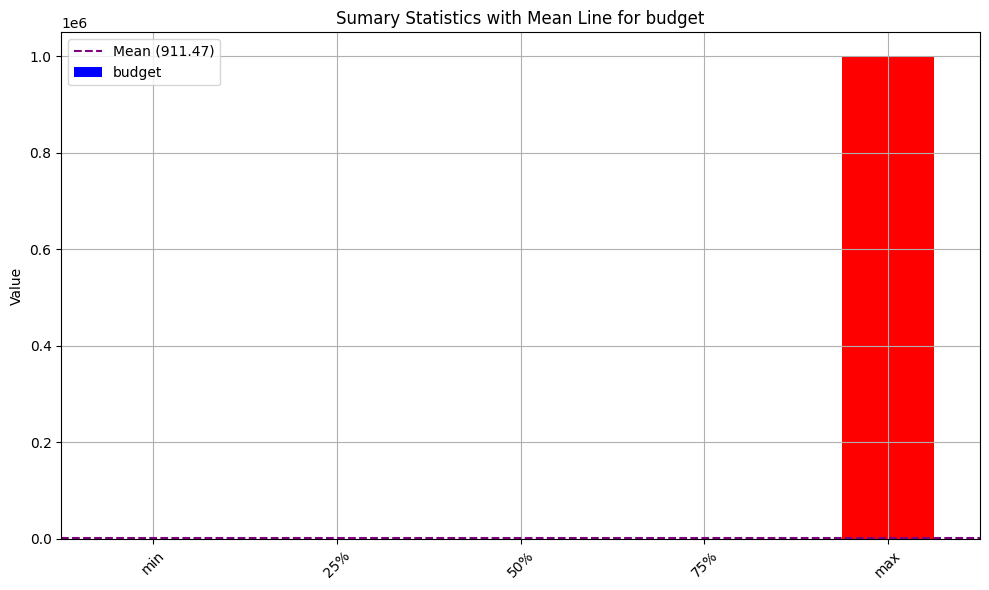

In [24]:
# Plot individually
for col in numeric_columns:
    if col in desc.columns:
        plt.figure(figsize=(10,6))
        desc[col][['min','25%','50%','75%','max']].plot(kind='bar', color=['blue', 'cyan', 'green', 'orange', 'red'])

        # Plot mean as a horizontal line
        mean_value = desc[col]['mean']
        plt.axhline(y=mean_value, color='purple', linestyle='--', label=f'Mean ({mean_value:.2f})')

        plt.title(f'Sumary Statistics with Mean Line for {col}')
        plt.ylabel('Value')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()


Where Most Oportunities Lie for Job Seeekers

1. Hourly Jobs (Low nd High Rates)
- From the Hourly Low Rate and Hourly High Rate histograms:
    - Most hourly jobs are paying between $5 to $30 per hour.
    - The Majority of jobs have low staring offer (around $10-$20/hour).
    - Higher-paying hourly jobs (above$50/hour) are very rare - only a small number of jobs offer that match.

***Conclusion***

- If a Job Seeker is targeting hourly jobs, they should except offers mostly between $5-$30/hr.
- Skills that can justify higher rates (like specialized tech skills, consulting, data science) are needed to reach the higher end of pay scale.

2. Fixed-Price Projects (Budget)
- From the Budget distribution histogram:
    - Most fixed-price projects have budget below $500.
    - There's sharp peak around $100-$300.
    - Only a few projects have a very large budget (like $5000-$10,000 or more).
    - Some exceptional projects even go up to $1 million, but these are extremely rare(outliers).

***Conclusion***
- For fixed-price work, small-to-medium sized projects dominate the market (under $500).
- Very high-budget projects exist but are not common. They usually require high expertise and strong client trust.

Overall Summary for Job Seekers:

| Aspect | Insights |
|:---|:---|
| **Hourly Jobs** | Most pay between **$5–$30/hr**; high-paying hourly jobs are rare. |
| **Fixed-price Projects** | Most budgets are **below $500**, usually **$100–$300**. |
| **Opportunities** | Focus on developing **high-demand skills** to aim for higher hourly rates and bigger projects. |
| **Realistic Expectation** | If starting fresh, expect smaller projects first, then move to bigger ones over time. |

Professional Tip

For building a Recommendation System:
- Recommend $5–$30/hr jobs first for beginners.
- Suggest fixed-price projects $100–$500 range for quick wins.
- Recommend skill-building paths for candidates who want higher salary or big projects.

In [25]:
# First Clean the Dataset
missing_summary = Dataset.isna().sum()

In [26]:
missing_summary

,0
title,1
link,1
published_date,0
is_hourly,0
hourly_low,142406
hourly_high,146053
budget,140937
country,5077


In [27]:
Dataset.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country'],
      dtype='object')

In [28]:
# Step-by-step null handling without dropping too much data
Dataset['title'] = Dataset['title'].fillna('Unknown Title')
Dataset['link'] = Dataset['link'].fillna('No Link')

In [29]:
Dataset.isna().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,142406
hourly_high,146053
budget,140937
country,5077


In [30]:
Dataset.dtypes

,0
title,object
link,object
published_date,object
is_hourly,bool
hourly_low,float64
hourly_high,float64
budget,float64
country,object


In [31]:
# Convert 'published_date' to datetime(no nulls)
Dataset['published_date'] = pd.to_datetime(Dataset['published_date'], errors='coerce')

In [32]:
# Fill missing 'hourly_low' and 'hourly_high' with median where is_hourly is True
hourly_mask = Dataset['is_hourly'] == True

In [33]:
hourly_mask

,is_hourly
0,False
1,False
2,True
3,True
4,False
...,...
244823,True
244824,False
244825,True
244826,False


In [34]:
Dataset.loc[hourly_mask,'hourly_low'] = Dataset.loc[hourly_mask,'hourly_low'].fillna(Dataset.loc[hourly_mask,'hourly_low'].median())
Dataset.loc[hourly_mask,'hourly_high'] = Dataset.loc[hourly_mask,'hourly_high'].fillna(Dataset.loc[hourly_mask,'hourly_high'].median())

In [35]:
# Fill missing 'budget' with median where is_hourly is False (Fixed-price jobs)
fixed_mask = Dataset['is_hourly'] == False

In [36]:
Dataset.loc[fixed_mask, 'budget'] = Dataset.loc[fixed_mask, 'budget'].fillna(Dataset.loc[fixed_mask,'budget'].median())

In [37]:
# Fill missing 'country' with 'Unknown'
Dataset['country'] = Dataset['country'].fillna('Unknown')

In [38]:
#Recheck missing values
final_missing_summary = Dataset.isna().sum()

In [39]:
final_missing_summary

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,103891
hourly_high,103891
budget,140937
country,0


- There are still missing values, so it can be handle by replacing -1 as 0 shows there is no pay for particular job.
- So instead of 0 put -1, so model might know that this means 'not applicable'.
- So it is done by adding a binary column (indicator) to flag this situation.

***Benefit***

Model now understand:
- Which rows have real pay data
- which rows are just placeholders(-1)

In [40]:
# Fill NaNs with -1 to indicate "Not Applicable"
Dataset['hourly_low'] = Dataset['hourly_low'].fillna(-1)
Dataset['hourly_high'] = Dataset['hourly_high'].fillna(-1)
Dataset['budget'] = Dataset['budget'].fillna(-1)

In [41]:
# Create indicator columns
Dataset['has_hourly'] = (Dataset['hourly_low'] != -1).astype(int)
Dataset['has_budget'] = (Dataset['budget'] != -1).astype(int)

In [42]:
# Show updated sample
Dataset[['is_hourly', 'hourly_low', 'hourly_high', 'budget', 'has_hourly', 'has_budget']].head(10)

,is_hourly,hourly_low,hourly_high,budget,has_hourly,has_budget
0,False,-1.0,-1.0,500.0,0,1
1,False,-1.0,-1.0,1100.0,0,1
2,True,10.0,30.0,-1.0,1,0
3,True,15.0,30.0,-1.0,1,0
4,False,-1.0,-1.0,650.0,0,1
5,True,15.0,30.0,-1.0,1,0
6,False,-1.0,-1.0,5.0,0,1
7,True,7.0,22.0,-1.0,1,0
8,True,15.0,30.0,-1.0,1,0
9,False,-1.0,-1.0,500.0,0,1


| Column         | Meaning                            |
|----------------|-------------------------------------|
| `has_hourly`   | `1` if the job has an hourly rate, `0` if not |
| `has_budget`   | `1` if the job has a fixed budget, `0` if not |

In [43]:
Dataset.isna().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0
has_hourly,0
has_budget,0


In [44]:
# Count of hourly vs fixed-price jobs
job_type_counts = Dataset['is_hourly'].value_counts()

In [45]:
job_type_counts

,count
is_hourly,
True,140937
False,103891


In [46]:
labels = ['Hourly','Fixed-Price']

In [47]:
sizes = [job_type_counts[True], job_type_counts[False]]

In [48]:
sizes

[140937, 103891]

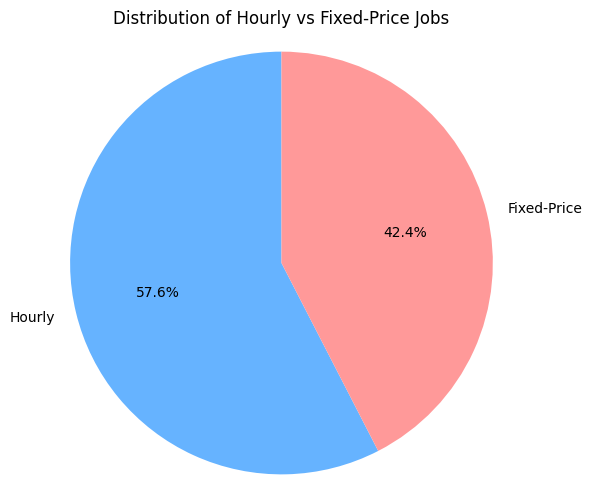

In [49]:
# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Hourly vs Fixed-Price Jobs')
plt.axis('equal') # equal aspect ratio ensures the pir is circular
plt.show()

In [50]:
# Bar chart showing the number of jobs per country(top 10 countries)
# To understand where most jobs are coming from.
# Get top 10 countries by job counts
top_countries = Dataset['country'].value_counts().head(10)

In [51]:
top_countries

,count
country,
United States,99834
United Kingdom,19149
India,15835
Australia,12618
Canada,11658
Pakistan,5291
Unknown,5077
Germany,4844
Netherlands,4435


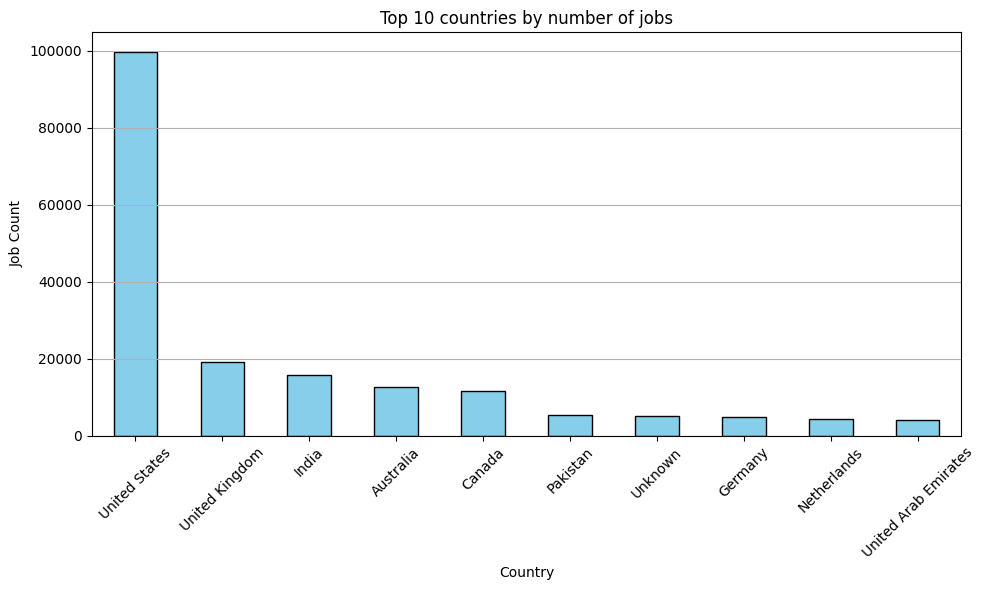

In [52]:
# Plot bar chart
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 countries by number of jobs')
plt.xlabel('Country')
plt.ylabel('Job Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

This gives a sense of market geography-useful for targeting or filtering job recommendation.

Explore pay range comparisons by country

In [53]:
# Filter hourly jobs with valid hourly_low and hourly_high
hourly_jobs = Dataset[Dataset['is_hourly'] == True].copy()

In [54]:
hourly_jobs.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'has_hourly', 'has_budget'],
      dtype='object')

In [55]:
# Remove rows with missing or invalid rates (-1 if previously filled)
hourly_jobs = hourly_jobs[(hourly_jobs['hourly_low'] > 0) & (hourly_jobs['hourly_high'] > 0)]

In [56]:
hourly_jobs.head(10)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,has_hourly,has_budget
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,-1.0,United States,1,0
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,-1.0,United States,1,0
5,SEO for Portuguese Psychologist site,https://www.upwork.com/jobs/SEO-for-Portuguese...,2024-02-17 09:07:41+00:00,True,15.0,30.0,-1.0,Portugal,1,0
7,need Portuguese writers who can understand and...,https://www.upwork.com/jobs/need-Portuguese-wr...,2024-02-17 09:07:05+00:00,True,7.0,22.0,-1.0,India,1,0
8,Looker Studio Dashboard for Leadgen and E-Comm...,https://www.upwork.com/jobs/Looker-Studio-Dash...,2024-02-17 09:06:24+00:00,True,15.0,30.0,-1.0,Germany,1,0
12,Affiliate Marketing,https://www.upwork.com/jobs/Affiliate-Marketin...,2024-02-17 09:04:27+00:00,True,15.0,30.0,-1.0,Singapore,1,0
13,URGENT: Fix Emails Not Working on Discourse In...,https://www.upwork.com/jobs/URGENT-Fix-Emails-...,2024-02-17 09:04:14+00:00,True,40.0,75.0,-1.0,United Kingdom,1,0
15,Web3 Full-stack Developer,https://www.upwork.com/jobs/Web3-Full-stack-De...,2024-02-17 09:04:02+00:00,True,30.0,50.0,-1.0,Malaysia,1,0
18,"Website design, UI/UX Design",https://www.upwork.com/jobs/Website-design-Des...,2024-02-17 09:02:08+00:00,True,12.0,30.0,-1.0,India,1,0
19,Customer Service,https://www.upwork.com/jobs/Customer-Service_%...,2024-02-17 09:01:52+00:00,True,4.0,8.0,-1.0,Canada,1,0


In [57]:
# Group by country and calculate average low and high rates
avg_hourly_rates = hourly_jobs.groupby('country')[['hourly_low', 'hourly_high']].mean().reset_index()

In [58]:
avg_hourly_rates

,country,hourly_low,hourly_high
0,Albania,15.246377,35.884058
1,Algeria,13.661765,30.838235
2,American Samoa,12.333333,26.666667
3,Andorra,13.000000,46.454545
4,Angola,17.166667,36.000000
...,...,...,...
197,Venezuela,12.426829,27.853659
198,Vietnam,14.847403,42.827922
199,Yemen,13.750000,31.250000
200,Zambia,19.142857,52.750000


# region wise or continent wise plotting..
# avg hourly rate contient wise


In [225]:
country_to_continent = {
    'United States': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'France': 'Europe',
    'India': 'Asia',
    'China': 'Asia',
    'Australia': 'Oceania',
    'Brazil': 'South America',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',
    # add more as needed...
}

# Map countries to continents
hourly_jobs['continent'] = hourly_jobs['country'].map(country_to_continent)

#Group by continent and calculate mean hourly rates
avg_by_continent = hourly_jobs.groupby('continent')[['hourly_low', 'hourly_high']].mean().reset_index()

print(avg_by_continent)


       continent  hourly_low  hourly_high
0         Africa   15.363734    35.910944
1           Asia   14.911463    32.443913
2         Europe   15.285345    35.977802
3  North America   18.187952    40.546953
4        Oceania   14.444850    33.341972
5  South America   15.942568    35.192568


<Figure size 900x600 with 0 Axes>

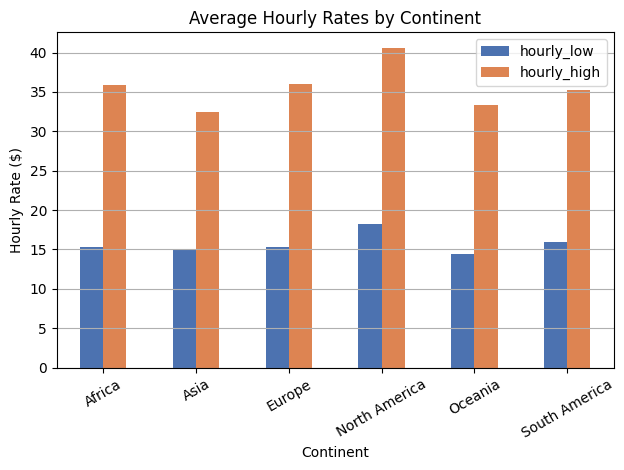

In [226]:
# Plotting the grouped result
plt.figure(figsize=(9, 6))
avg_by_continent.plot(kind='bar', x='continent', y=['hourly_low', 'hourly_high'], color=['#4c72b0', '#dd8452'])
plt.title("Average Hourly Rates by Continent")
plt.ylabel("Hourly Rate ($)")
plt.xlabel("Continent")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()


In [228]:
import folium
from folium import plugins

# Create styled map
map_world = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB dark_matter')

# Coordinates (example)
latitude_mapping = {'United States': 37.0902, 'United Kingdom': 51.509865, 'India': 20.5937}
longitude_mapping = {'United States': -95.7129, 'United Kingdom': -0.118092, 'India': 78.9629}

# Color function based on hourly_high
def get_color(rate):
    if rate > 200:
        return 'darkred'
    elif rate > 150:
        return 'orange'
    else:
        return 'green'

# Add hover-based tooltips instead of popups
for index, row in avg_hourly_rates.iterrows():
    country = row['country']
    if country in latitude_mapping:
        tooltip_text = (
            f"<b>{country}</b><br>"
            f"Low Rate: ${row['hourly_low']:.2f}<br>"
            f"High Rate: ${row['hourly_high']:.2f}"
        )
        folium.CircleMarker(
            location=[latitude_mapping[country], longitude_mapping[country]],
            radius=8,
            color=get_color(row['hourly_high']),
            fill=True,
            fill_color=get_color(row['hourly_high']),
            fill_opacity=0.7,
            tooltip=folium.Tooltip(tooltip_text, sticky=True),
        ).add_to(map_world)

# Optional: Fullscreen control
plugins.Fullscreen(position='topright').add_to(map_world)

# Save map
map_world



***Suggestions***
- higher, lower, median hourly rate..to avoid these overlapping..

***Continent wise distribution***

In [63]:
import folium

# Create a base map centered globally
map_world = folium.Map(location=[20, 0], zoom_start=2)

# Define continent groupings
continent_mapping = {
    'North America': ['United States', 'Canada', 'Mexico'],
    'Europe': ['United Kingdom', 'Germany', 'Netherlands', 'France', 'Spain'],
    'Asia': ['India', 'Pakistan', 'China', 'Japan', 'United Arab Emirates'],
    'Oceania': ['Australia', 'New Zealand'],
    'South America': ['Brazil', 'Argentina'],
    'Africa': ['South Africa', 'Egypt', 'Nigeria']
}

# Aggregate data by continent
hourly_jobs['continent'] = hourly_jobs['country'].map(
    lambda x: next((k for k, v in continent_mapping.items() if x in v), 'Other')
)

avg_hourly_rates_continent = hourly_jobs.groupby('continent')[['hourly_low', 'hourly_high']].mean().reset_index()


In [231]:
from folium import plugins

# Base map with modern dark styling
map_world = folium.Map(location=[10, 10], zoom_start=2, tiles='CartoDB dark_matter')

# Coordinates for continents
continent_locations = {
    'North America': [40.0, -100.0], 'Europe': [50.0, 10.0], 'Asia': [30.0, 100.0],
    'Oceania': [-25.0, 135.0], 'South America': [-15.0, -60.0], 'Africa': [0.0, 20.0]
}

# Example: avg_hourly_rates_continent is your dataframe with 'continent', 'hourly_low', 'hourly_high'

# Color function
def get_color(rate):
    if rate > 170:
        return 'darkred'
    elif rate > 120:
        return 'orange'
    else:
        return 'green'

# Add styled circle markers with hoverable tooltips
for index, row in avg_hourly_rates_continent.iterrows():
    continent = row['continent']
    if continent in continent_locations:
        lat, lon = continent_locations[continent]
        tooltip_text = (
            f"<b>{continent}</b><br>"
            f"Low Rate: ${row['hourly_low']:.2f}<br>"
            f"High Rate: ${row['hourly_high']:.2f}"
        )
        folium.CircleMarker(
            location=[lat, lon],
            radius=15,
            color=get_color(row['hourly_high']),
            fill=True,
            fill_opacity=0.85,
            fill_color=get_color(row['hourly_high']),
            tooltip=folium.Tooltip(tooltip_text, sticky=True)
        ).add_to(map_world)

# Add fullscreen button
plugins.Fullscreen(position='topright').add_to(map_world)

# Save as HTML
map_world.save("continent_hourly_rates_map.html")



In [232]:
map_world

top 10 countries, or region wise

In [66]:
hourly_jobs['country']

,country
2,United States
3,United States
5,Portugal
7,India
8,Germany
...,...
244820,Argentina
244821,United Kingdom
244822,United States
244823,Zambia


In [67]:
# Get top 10 countries by job count in hourly jobs
top_countries_hourly = hourly_jobs['country'].value_counts().head(10).reset_index()

In [68]:
top_countries_hourly

,country,count
0,United States,64794
1,United Kingdom,11335
2,Australia,7679
3,Canada,7086
4,India,6789
5,Unknown,2875
6,Germany,2853
7,Netherlands,2504
8,United Arab Emirates,2127
9,Pakistan,2067


In [69]:
top_countries_hourly['country']

,country
0,United States
1,United Kingdom
2,Australia
3,Canada
4,India
5,Unknown
6,Germany
7,Netherlands
8,United Arab Emirates
9,Pakistan


In [70]:
top_countries_list = top_countries_hourly['country'].tolist()  # Convert to a list of country names

In [71]:
top_countries_list

['United States',
 'United Kingdom',
 'Australia',
 'Canada',
 'India',
 'Unknown',
 'Germany',
 'Netherlands',
 'United Arab Emirates',
 'Pakistan']

In [72]:
avg_hourly_rates_top = avg_hourly_rates[avg_hourly_rates['country'].isin(top_countries_list)]

In [73]:
avg_hourly_rates_top

,country,hourly_low,hourly_high
10,Australia,14.444850,33.341972
33,Canada,14.835309,36.380610
67,Germany,16.065545,36.183666
84,India,14.716306,31.882604
127,Netherlands,13.787540,32.776757
137,Pakistan,15.151911,33.118045
188,United Arab Emirates,15.335684,34.642219
189,United Kingdom,15.924482,38.986943
190,United States,18.554604,41.002593
193,Unknown,17.271304,38.581913


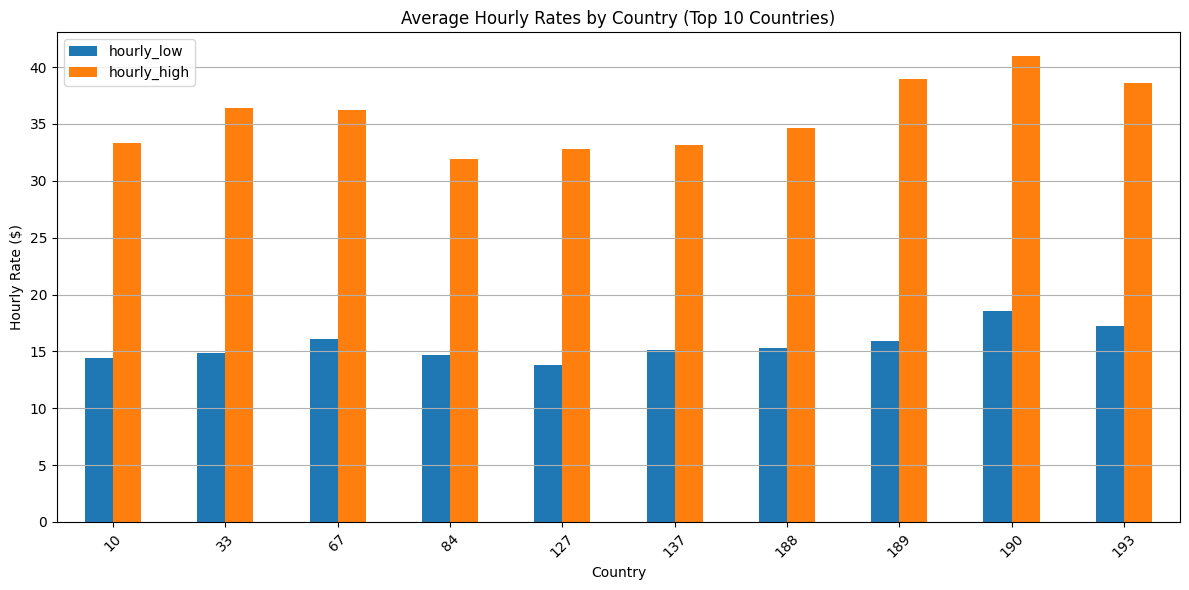

In [74]:
# Plot the graph
avg_hourly_rates_top.plot(kind ='bar', figsize=(12,6))
plt.title('Average Hourly Rates by Country (Top 10 Countries)')
plt.ylabel('Hourly Rate ($)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

***Conclusion***
- Countries like the USA, UK, and Australia tend to offer higher hourly rates on average.
- Some countries show larger gaps between hourly_low and hourly_high, possibly indicating broader pay ranges or project scopes.

In [75]:
latitude_mapping = {
    'United States': 37.0902, 'United Kingdom': 51.509865, 'Australia': -25.2744,
    'Canada': 56.1304, 'India': 20.5937, 'Germany': 51.1657, 'Netherlands': 52.3676,
    'United Arab Emirates': 23.4241, 'Pakistan': 30.3753
}

longitude_mapping = {
    'United States': -95.7129, 'United Kingdom': -0.118092, 'Australia': 133.7751,
    'Canada': -106.3468, 'India': 78.9629, 'Germany': 10.4515, 'Netherlands': 4.9041,
    'United Arab Emirates': 53.8478, 'Pakistan': 69.3451
}


In [76]:
import folium

# Create a base map centered globally
map_world = folium.Map(location=[20, 0], zoom_start=2)

# Add country markers with hourly rate details
for index, row in avg_hourly_rates_top.iterrows():
    country = row['country']
    if country in latitude_mapping:
        folium.Marker(
            location=[latitude_mapping[country], longitude_mapping[country]],
            popup=f"{country}\nLow Rate: ${row['hourly_low']:.2f}\nHigh Rate: ${row['hourly_high']:.2f}",
        ).add_to(map_world)

# Save the map output
map_world.save("top_hourly_rates_map.html")


In [77]:
map_world

In [78]:
from google.colab import files
files.download("top_hourly_rates_map.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 fixed-price jobs (budget) by country

In [79]:
# Filter fixed-price jobs with valid budget values
fixed_jobs = Dataset[(Dataset['is_hourly'] == False) & (Dataset['budget'].notna()) & (Dataset['budget'] > 0)]

In [80]:
fixed_jobs

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,has_hourly,has_budget
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,-1.0,-1.0,500.0,Unknown,0,1
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,-1.0,-1.0,1100.0,United States,0,1
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,-1.0,-1.0,650.0,India,0,1
6,Want to fix the WordPress Plugin,https://www.upwork.com/jobs/Want-fix-the-WordP...,2024-02-17 09:07:27+00:00,False,-1.0,-1.0,5.0,India,0,1
9,PHP/HTML/CSS WordPress Developer Needed for We...,https://www.upwork.com/jobs/PHP-HTML-CSS-WordP...,2024-02-17 09:06:21+00:00,False,-1.0,-1.0,500.0,Canada,0,1
...,...,...,...,...,...,...,...,...,...,...
244817,Set-up ASPEN process simulation in DWSIM,https://www.upwork.com/jobs/Set-ASPEN-process-...,2024-03-24 13:27:03+00:00,False,-1.0,-1.0,500.0,United Kingdom,0,1
244819,API developer FastAPI,https://www.upwork.com/jobs/API-developer-Fast...,2024-03-24 13:55:22+00:00,False,-1.0,-1.0,600.0,India,0,1
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,-1.0,-1.0,100.0,Sri Lanka,0,1
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,-1.0,-1.0,15.0,France,0,1


In [81]:
# Group by country and calculate average budget
avg_budgets = fixed_jobs.groupby('country')['budget'].mean()

In [82]:
avg_budgets

,budget
country,
Aland Islands,2000.000000
Albania,288.227273
Algeria,116.887640
American Samoa,64.727273
Andorra,919.500000
...,...
Venezuela,595.240000
Vietnam,1282.691120
Yemen,126.470588


In [83]:
# Get top 10 countries by job count in fixed-price jobs
top_countries_fixed = fixed_jobs['country'].value_counts().head(10).index

In [84]:
top_countries_fixed

Index(['United States', 'India', 'United Kingdom', 'Australia', 'Canada',
       'Pakistan', 'Unknown', 'Germany', 'Netherlands',
       'United Arab Emirates'],
      dtype='object', name='country')

In [85]:
avg_budgets_top = avg_budgets.loc[top_countries_fixed]

In [86]:
avg_budgets_top

,budget
country,
United States,845.795462
India,1471.977891
United Kingdom,860.562452
Australia,740.250456
Canada,1445.852362
Pakistan,385.960298
Unknown,1071.773842
Germany,602.481165
Netherlands,423.740549


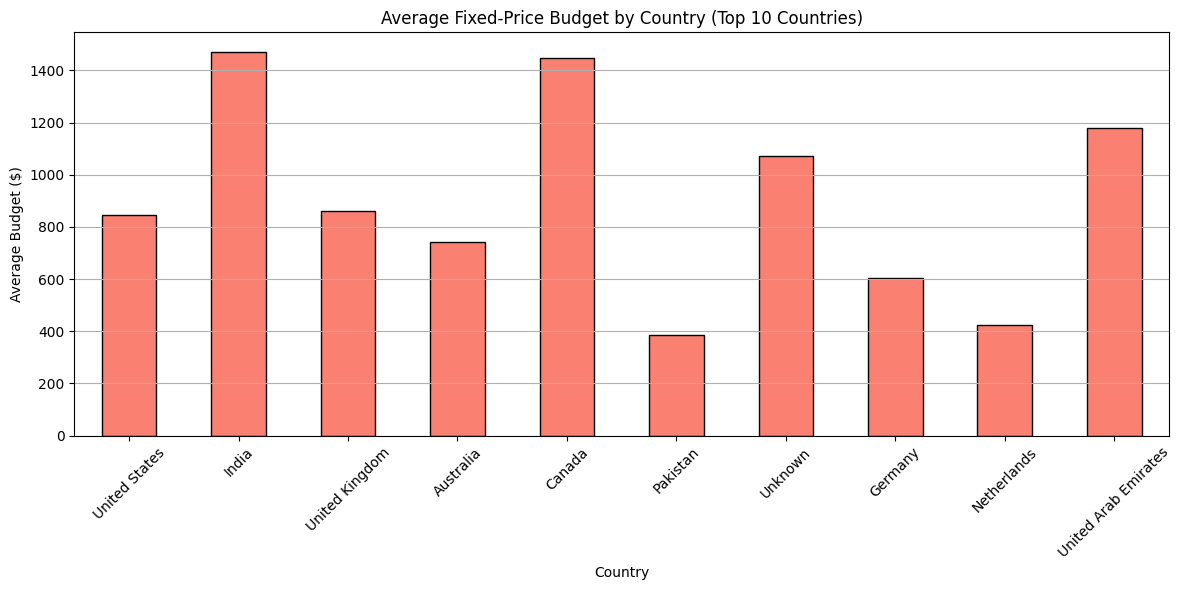

In [87]:
# Plot bar chart of average fixed-price budgets
plt.figure(figsize=(12,6))
avg_budgets_top.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Fixed-Price Budget by Country (Top 10 Countries)')
plt.ylabel('Average Budget ($)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

***Conclusion***
- Countries like the United States and India often offer higher budgets for fixed-price jobs.
- This data is helpful for freelancers or platform analysts who want to target high-paying countries.

Task 1: Analyze the correlation between job title keywords and offered salaries

Why Use Word Embeddings instead of Regex?

- Regex + frequency gives you the most frequent words, but no sense of meaning or context.
- Word embeddings (like Word2Vec, GloVe, or BERT) map words to vector space, capturing semantic similarity — e.g., "developer", "engineer", and "coder" will be close in vector space.

In [88]:
Dataset.isna().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0
has_hourly,0
has_budget,0


In [89]:
# Extract top keywords from job titles
# Make the title lower case and Fill Nan
Dataset['title'] = Dataset['title'].fillna('').str.lower()

In [90]:
# Extract top 100 Keywords
vectorizer = CountVectorizer(stop_words='english', max_features=100)

In [91]:
# Transform job title into word count
x = vectorizer.fit_transform(Dataset['title'])

In [92]:
x.shape

(244828, 100)

In [93]:
keywords = vectorizer.get_feature_names_out()

In [94]:
keywords

array(['3d', 'account', 'ad', 'ads', 'agency', 'ai', 'amazon', 'amp',
       'api', 'app', 'application', 'assistant', 'based', 'book', 'brand',
       'build', 'business', 'channel', 'company', 'content', 'create',
       'creation', 'creator', 'data', 'design', 'designer', 'developer',
       'development', 'digital', 'editing', 'editor', 'email', 'engineer',
       'english', 'entry', 'estate', 'excel', 'experience', 'experienced',
       'expert', 'facebook', 'generation', 'google', 'graphic', 'help',
       'instagram', 'integration', 'job', 'lead', 'logo', 'long',
       'looking', 'management', 'manager', 'marketing', 'media', 'mobile',
       'native', 'need', 'needed', 'new', 'online', 'page', 'product',
       'project', 'python', 'react', 'real', 'required', 'research',
       'sales', 'script', 'seeking', 'seo', 'setup', 'shopify', 'short',
       'simple', 'site', 'social', 'software', 'specialist', 'stack',
       'store', 'support', 'term', 'tiktok', 'time', 'ui', 'using

In [95]:
# Define a list of unwanted keywords (e.g., common words that don't help in analysis)
unwanted_keywords = ['native','needed', 'need', 'based', 'new', 'long', 'term', 'looking', 'work', 'job', 'help', 'required', 'seeking']

In [96]:
# Filter out unwanted keywords from the keywords array
filtered_keywords = [word for word in keywords if word not in unwanted_keywords]

In [97]:
# Display the filtered list of keywords
print(filtered_keywords)

['3d', 'account', 'ad', 'ads', 'agency', 'ai', 'amazon', 'amp', 'api', 'app', 'application', 'assistant', 'book', 'brand', 'build', 'business', 'channel', 'company', 'content', 'create', 'creation', 'creator', 'data', 'design', 'designer', 'developer', 'development', 'digital', 'editing', 'editor', 'email', 'engineer', 'english', 'entry', 'estate', 'excel', 'experience', 'experienced', 'expert', 'facebook', 'generation', 'google', 'graphic', 'instagram', 'integration', 'lead', 'logo', 'management', 'manager', 'marketing', 'media', 'mobile', 'online', 'page', 'product', 'project', 'python', 'react', 'real', 'research', 'sales', 'script', 'seo', 'setup', 'shopify', 'short', 'simple', 'site', 'social', 'software', 'specialist', 'stack', 'store', 'support', 'tiktok', 'time', 'ui', 'using', 'ux', 'video', 'videos', 'virtual', 'web', 'website', 'wordpress', 'writer', 'youtube']


In [98]:
# Match filtered keywords with the original data
# Use only the columns from X corresponding to the filtered keywords
filtered_column_indices = [i for i, keyword in enumerate(keywords) if keyword in filtered_keywords]

In [99]:
# 5. Convert job title words into a DataFrame using the filtered columns
filtered_X = x[:, filtered_column_indices]  # Only select the columns corresponding to the filtered keywords

In [100]:
# Convert job title words into a DataFrame
keyword_df = pd.DataFrame(filtered_X.toarray(), columns = filtered_keywords)

In [101]:
keyword_df.columns

Index(['3d', 'account', 'ad', 'ads', 'agency', 'ai', 'amazon', 'amp', 'api',
       'app', 'application', 'assistant', 'book', 'brand', 'build', 'business',
       'channel', 'company', 'content', 'create', 'creation', 'creator',
       'data', 'design', 'designer', 'developer', 'development', 'digital',
       'editing', 'editor', 'email', 'engineer', 'english', 'entry', 'estate',
       'excel', 'experience', 'experienced', 'expert', 'facebook',
       'generation', 'google', 'graphic', 'instagram', 'integration', 'lead',
       'logo', 'management', 'manager', 'marketing', 'media', 'mobile',
       'online', 'page', 'product', 'project', 'python', 'react', 'real',
       'research', 'sales', 'script', 'seo', 'setup', 'shopify', 'short',
       'simple', 'site', 'social', 'software', 'specialist', 'stack', 'store',
       'support', 'tiktok', 'time', 'ui', 'using', 'ux', 'video', 'videos',
       'virtual', 'web', 'website', 'wordpress', 'writer', 'youtube'],
      dtype='object')

In [102]:
# Merge the keywords DataFrame with the salary data
salary_keywords_df = pd.concat([keyword_df, Dataset[['hourly_low', 'hourly_high','budget']]], axis=1)

In [103]:
salary_keywords_df.columns

Index(['3d', 'account', 'ad', 'ads', 'agency', 'ai', 'amazon', 'amp', 'api',
       'app', 'application', 'assistant', 'book', 'brand', 'build', 'business',
       'channel', 'company', 'content', 'create', 'creation', 'creator',
       'data', 'design', 'designer', 'developer', 'development', 'digital',
       'editing', 'editor', 'email', 'engineer', 'english', 'entry', 'estate',
       'excel', 'experience', 'experienced', 'expert', 'facebook',
       'generation', 'google', 'graphic', 'instagram', 'integration', 'lead',
       'logo', 'management', 'manager', 'marketing', 'media', 'mobile',
       'online', 'page', 'product', 'project', 'python', 'react', 'real',
       'research', 'sales', 'script', 'seo', 'setup', 'shopify', 'short',
       'simple', 'site', 'social', 'software', 'specialist', 'stack', 'store',
       'support', 'tiktok', 'time', 'ui', 'using', 'ux', 'video', 'videos',
       'virtual', 'web', 'website', 'wordpress', 'writer', 'youtube',
       'hourly_low', 'hou

In [104]:
# Calculate correlation between keywords and salary data
correlation = salary_keywords_df.corr()

In [105]:
# Get the correlation between each keyword and the hourly salaries
correlation_keywords_salary = correlation.loc[['hourly_low','hourly_high', 'budget']].iloc[:100]

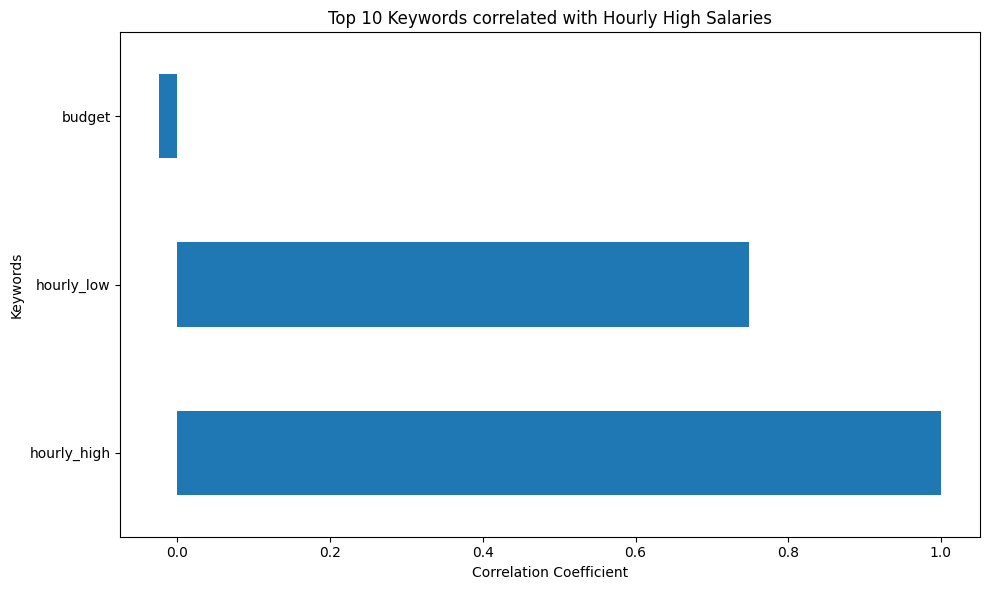

In [106]:
# Plot the top correlated keywords
plt.figure(figsize=(10,6))
correlation_keywords_salary['hourly_high'].sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Keywords correlated with Hourly High Salaries')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Keywords')
plt.tight_layout()
plt.show()

In [107]:
correlation_keywords_salary

,3d,account,ad,ads,agency,ai,amazon,amp,api,app,...,videos,virtual,web,website,wordpress,writer,youtube,hourly_low,hourly_high,budget
hourly_low,-0.015136,-0.014432,0.005069,0.011983,0.003926,0.011123,-0.011005,0.012435,0.002106,-0.020758,...,-0.028766,-0.019795,0.003282,-0.020300,-0.012514,-0.002973,-0.046320,1.000000,0.748567,-0.026245
hourly_high,-0.014865,-0.013482,0.004716,0.044964,0.004269,0.012081,-0.008014,0.007821,-0.000935,-0.023931,...,-0.024798,-0.019404,-0.004412,-0.027044,-0.019502,0.002001,-0.035429,0.748567,1.000000,-0.023561
budget,0.004059,0.006952,-0.002138,-0.003052,-0.000159,0.001872,0.001736,0.001452,-0.001097,0.002662,...,-0.001862,-0.001689,-0.000332,-0.004072,-0.001818,-0.002159,-0.003588,-0.026245,-0.023561,1.000000


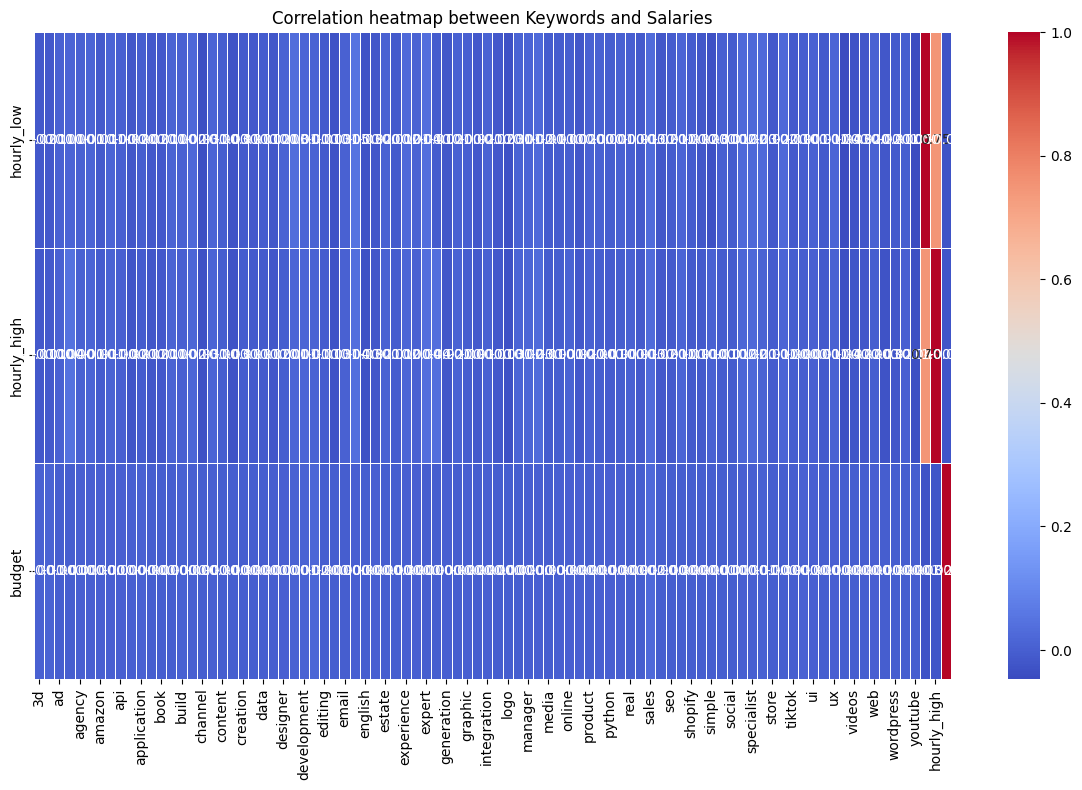

In [108]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_keywords_salary, annot=True, cmap='coolwarm', fmt='.2f',linewidths=0.5)
plt.title('Correlation heatmap between Keywords and Salaries')
plt.tight_layout()
plt.show()

In [109]:
summary_stats = correlation_keywords_salary.describe()

In [110]:
summary_stats

,3d,account,ad,ads,agency,ai,amazon,amp,api,app,...,videos,virtual,web,website,wordpress,writer,youtube,hourly_low,hourly_high,budget
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,-0.008647,-0.006987,0.002549,0.017965,0.002678,0.008359,-0.005761,0.007236,0.000025,-0.014009,...,-0.018475,-0.013629,-0.000488,-0.017139,-0.011278,-0.001044,-0.028446,0.574107,0.575002,0.316731
std,0.011005,0.012081,0.004063,0.024561,0.002464,0.005638,0.006663,0.005515,0.001804,0.014525,...,0.014523,0.010342,0.003849,0.011808,0.008906,0.002668,0.022206,0.534904,0.533397,0.591729
min,-0.015136,-0.014432,-0.002138,-0.003052,-0.000159,0.001872,-0.011005,0.001452,-0.001097,-0.023931,...,-0.028766,-0.019795,-0.004412,-0.027044,-0.019502,-0.002973,-0.046320,-0.026245,-0.023561,-0.026245
25%,-0.015000,-0.013957,0.001289,0.004465,0.001883,0.006498,-0.009509,0.004636,-0.001016,-0.022344,...,-0.026782,-0.019599,-0.002372,-0.023672,-0.016008,-0.002566,-0.040875,0.361161,0.362503,-0.024903
50%,-0.014865,-0.013482,0.004716,0.011983,0.003926,0.011123,-0.008014,0.007821,-0.000935,-0.020758,...,-0.024798,-0.019404,-0.000332,-0.020300,-0.012514,-0.002159,-0.035429,0.748567,0.748567,-0.023561
75%,-0.005403,-0.003265,0.004892,0.028474,0.004097,0.011602,-0.003139,0.010128,0.000585,-0.009048,...,-0.013330,-0.010546,0.001475,-0.012186,-0.007166,-0.000079,-0.019508,0.874284,0.874284,0.488220
max,0.004059,0.006952,0.005069,0.044964,0.004269,0.012081,0.001736,0.012435,0.002106,0.002662,...,-0.001862,-0.001689,0.003282,-0.004072,-0.001818,0.002001,-0.003588,1.000000,1.000000,1.000000


***Observation***

Keywords like "developer", "python", and "react" might show higher correlations with the hourly high salary.

 Do Frquency count for every word....

In [111]:
filtered_word_counts = filtered_X.sum(axis=0).A1

In [112]:
# Create a Dataframe to display the word frequencies
filtered_word_frequency_df = pd.DataFrame({'word' : filtered_keywords, 'frequency': filtered_word_counts})
filtered_word_frequency_df = filtered_word_frequency_df.sort_values(by='frequency', ascending=False)


In [113]:
filtered_word_frequency_df.head(10)

,word,frequency
83,website,16865
25,developer,16062
38,expert,15021
79,video,14138
23,design,13269
24,designer,12957
7,amp,9689
70,specialist,9032
49,marketing,8416
9,app,8282


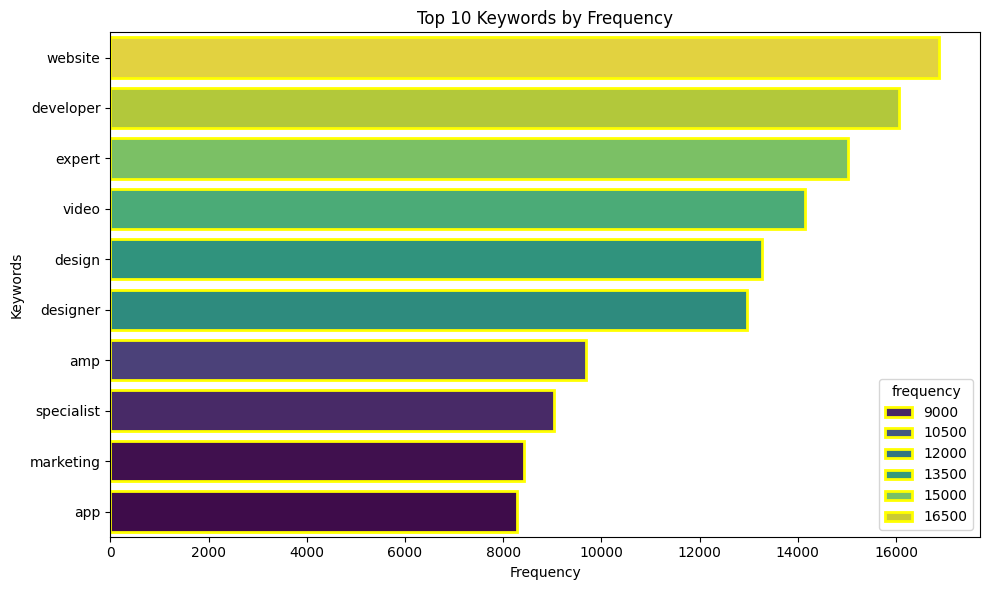

In [114]:
plt.figure(figsize=(10,6))
sns.barplot(x='frequency', y='word', data=filtered_word_frequency_df.head(10),hue= 'frequency', color='skyblue', edgecolor='yellow', linewidth=2, orient='h', palette='viridis')
plt.title('Top 10 Keywords by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.tight_layout()
plt.show()

-------------------------------------

Task 2: Identify emerging job categories based on posting frequency


***Objective***

Identify new and emerging job category by analyzing the frequency and trends of job posting over time.

In [115]:
# Aggregate job postings by category and Month-Year
Dataset['published_date'] = pd.to_datetime(Dataset['published_date'])

In [116]:
Dataset['month_year'] = Dataset['published_date'].dt.to_period('M')

<ipython-input-116-82035368bf1f>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  Dataset['month_year'] = Dataset['published_date'].dt.to_period('M')


In [117]:
Dataset.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'has_hourly', 'has_budget',
       'month_year'],
      dtype='object')

In [118]:
# Filter out keywords that are already in the filtered_keyword list
new_keywords = [keyword for keyword in keywords if keyword not in filtered_keywords]

In [119]:
new_keywords

['based',
 'help',
 'job',
 'long',
 'looking',
 'native',
 'need',
 'needed',
 'new',
 'required',
 'seeking',
 'term',
 'work']

In [120]:
# Define unwanted keywords (common words that don't add value)
unwanted_keywords = ['based', 'help', 'job', 'long', 'looking', 'native', 'need', 'needed', 'new', 'required', 'seeking', 'term', 'work']

In [121]:
# Filter out unwanted keywords from the new_keywords list
new_keywords_filtered = [word for word in new_keywords if word not in unwanted_keywords]

In [122]:
# Combine the filtered new keywords with the original filtered keywords
combined_keywords = filtered_keywords + new_keywords_filtered

In [123]:
combined_keywords

['3d',
 'account',
 'ad',
 'ads',
 'agency',
 'ai',
 'amazon',
 'amp',
 'api',
 'app',
 'application',
 'assistant',
 'book',
 'brand',
 'build',
 'business',
 'channel',
 'company',
 'content',
 'create',
 'creation',
 'creator',
 'data',
 'design',
 'designer',
 'developer',
 'development',
 'digital',
 'editing',
 'editor',
 'email',
 'engineer',
 'english',
 'entry',
 'estate',
 'excel',
 'experience',
 'experienced',
 'expert',
 'facebook',
 'generation',
 'google',
 'graphic',
 'instagram',
 'integration',
 'lead',
 'logo',
 'management',
 'manager',
 'marketing',
 'media',
 'mobile',
 'online',
 'page',
 'product',
 'project',
 'python',
 'react',
 'real',
 'research',
 'sales',
 'script',
 'seo',
 'setup',
 'shopify',
 'short',
 'simple',
 'site',
 'social',
 'software',
 'specialist',
 'stack',
 'store',
 'support',
 'tiktok',
 'time',
 'ui',
 'using',
 'ux',
 'video',
 'videos',
 'virtual',
 'web',
 'website',
 'wordpress',
 'writer',
 'youtube']

In [124]:
# Function to categorize job titles based on combined keywords
def categorized_by_combined_keywords(title):
  words = title.lower().split()
  for word in words:
    if word in combined_keywords:
      return word # Use the keyword as the category
  return 'Other'  # If no keyword is found, classify as 'Other'

In [125]:
# Apply the categorization function to each job title
Dataset['category'] = Dataset['title'].apply(categorized_by_combined_keywords)

In [126]:
# Check unique categories and the number of occurences of each category
category_counts = Dataset['category'].value_counts()

In [127]:
category_counts

,count
category,
Other,55392
video,8421
website,7996
expert,7839
developer,6905
...,...
channel,208
entry,147
generation,135


In [128]:
# Group by Month and Category
job_postings_by_category_month = Dataset.groupby(['month_year','category']).size().unstack(fill_value=0)

-----------------------------------------

In [129]:
# Define a list of job roles to look for in the title
job_roles = ['developer', 'designer', 'data scientist', 'project manager', 'analyst',
             'content writer', 'writer', 'marketing specialist', 'marketing','manager', 'engineer',
             'architect', 'tester', 'assistant', 'consultant', 'media buyer', 'resercher',
             'assistant', 'editor', 'assistant', 'translator', 'psychologist' ]

In [130]:
# Create a function that returns the category based on the title
def categorize_title(title):
  if isinstance(title, str):
    title = title.lower()
    for role in job_roles:
      if role in title:
        return role
  return 'other'      # Default category if no match

In [131]:
# Apply the function to categorized job titles
Dataset['category'] = Dataset['title'].apply(lambda x: categorize_title(x))

In [132]:
# Check the updated DataFrame with categories
Dataset[['title', 'category']].head(10)

,title,category
0,experienced media buyer for solar pannel and r...,media buyer
1,full stack developer,developer
2,smma bubble app,other
3,talent hunter specialized in marketing,marketing
4,data engineer,engineer
5,seo for portuguese psychologist site,psychologist
6,want to fix the wordpress plugin,other
7,need portuguese writers who can understand and...,writer
8,looker studio dashboard for leadgen and e-comm...,other
9,php/html/css wordpress developer needed for we...,developer


In [133]:
Dataset

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,has_hourly,has_budget,month_year,category
0,experienced media buyer for solar pannel and r...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,-1.0,-1.0,500.0,Unknown,0,1,2024-02,media buyer
1,full stack developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,-1.0,-1.0,1100.0,United States,0,1,2024-02,developer
2,smma bubble app,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,-1.0,United States,1,0,2024-02,other
3,talent hunter specialized in marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,-1.0,United States,1,0,2024-02,marketing
4,data engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,-1.0,-1.0,650.0,India,0,1,2024-02,engineer
...,...,...,...,...,...,...,...,...,...,...,...,...
244823,need facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,-1.0,Zambia,1,0,2024-03,other
244824,digital/telemarketing/sales/outside sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,-1.0,-1.0,100.0,Sri Lanka,0,1,2024-03,marketing
244825,wordpress template edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,-1.0,United States,1,0,2024-03,other
244826,elementor pro for quick fix (wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,-1.0,-1.0,15.0,France,0,1,2024-03,other


In [134]:
Dataset.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'has_hourly', 'has_budget',
       'month_year', 'category'],
      dtype='object')

In [135]:
Dataset['category'].unique()

array(['media buyer', 'developer', 'other', 'marketing', 'engineer',
       'psychologist', 'writer', 'designer', 'manager', 'editor',
       'consultant', 'architect', 'translator', 'project manager',
       'marketing specialist', 'analyst', 'assistant', 'content writer',
       'tester', 'data scientist'], dtype=object)

In [136]:
# Convert publication date to datetime
Dataset['published_date'] = pd.to_datetime(Dataset['published_date'])

In [137]:
# Group by month/year and category, and count job posting
Dataset['month_year'] = Dataset['published_date'].dt.to_period('M')

<ipython-input-137-8dde00a7c348>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  Dataset['month_year'] = Dataset['published_date'].dt.to_period('M')


In [138]:
job_postings_by_month_category = Dataset.groupby(['month_year', 'category']).size().unstack(fill_value=0)

In [139]:
job_postings_by_month_category

category,analyst,architect,assistant,consultant,content writer,data scientist,designer,developer,editor,engineer,manager,marketing,marketing specialist,media buyer,other,project manager,psychologist,tester,translator,writer
month_year,,,,,,,,,,,,,,,,,,,,
2023-11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-12,0,0,0,0,1,0,0,0,1,0,0,1,0,0,6,0,0,0,0,1
2024-01,0,0,5,1,0,0,4,5,2,2,4,2,0,1,63,4,0,0,0,3
2024-02,494,415,2551,577,552,77,5259,6673,3210,1272,2205,2810,356,253,70932,322,17,287,540,3085
2024-03,610,625,3361,804,610,90,7417,9644,4632,1793,3235,4191,509,332,100101,437,15,351,563,3514


In [140]:
# plot trends of top categories over time
top_categories = job_postings_by_month_category.sum(axis=0).sort_values(ascending=False).head(10).index

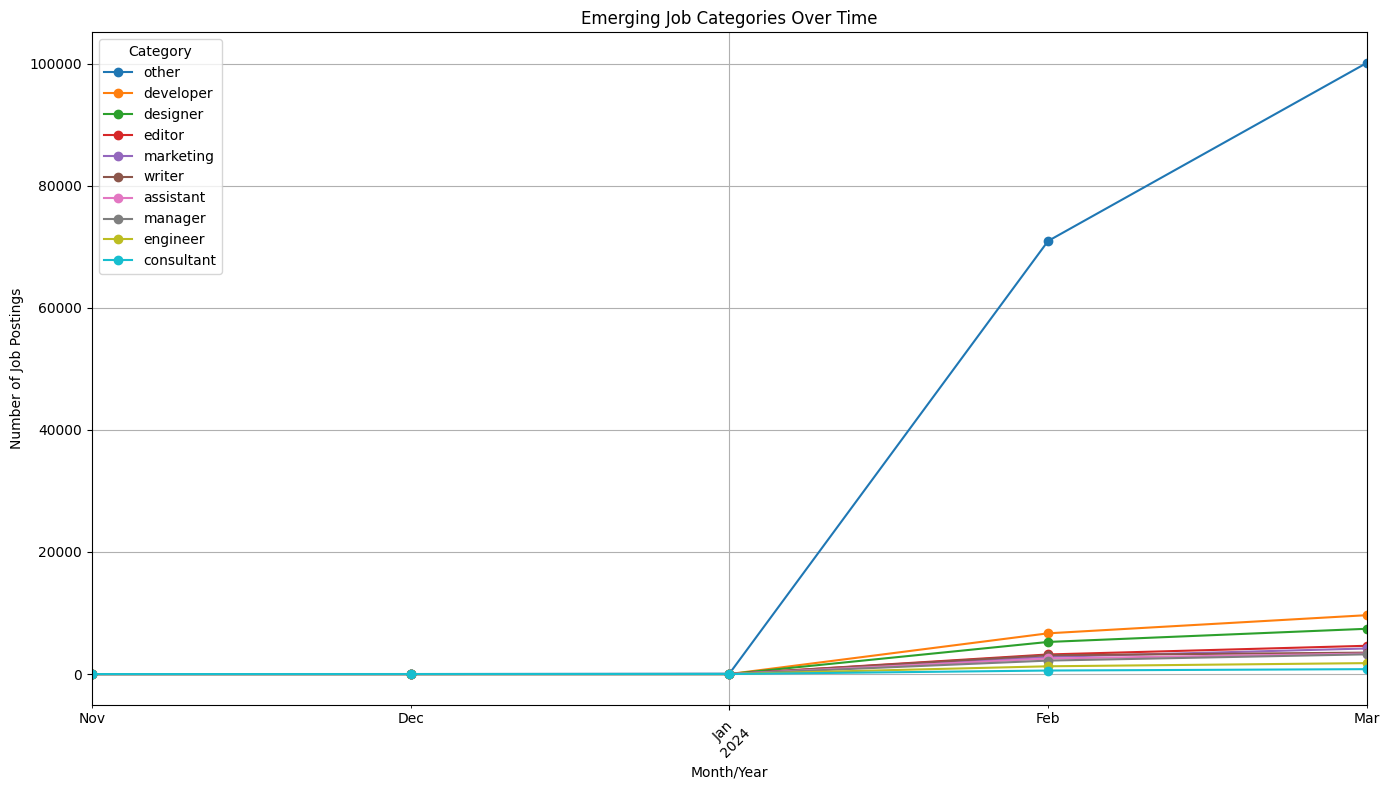

In [141]:
job_postings_by_month_category[top_categories].plot(figsize=(14,8), marker='o')
plt.title('Emerging Job Categories Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

- The analysis reveals that developer and engineering roles show consistent growth, driven by demand for tech talent.
- Data science and AI roles are emerging strongly, while design and content writing, consultant are growing at a slower pace.
- Managerial and business-related roles show fluctuating trends. Overall, tech and data fields are the most promising for job seekers, with specialized skills gaining traction.

In [142]:
Dataset.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'has_hourly', 'has_budget',
       'month_year', 'category'],
      dtype='object')

Task 3: Predict high-demand job roles by analyzing job posting patterns over time

Code to predict High-Demand Job Roles:
LSTM Model

-----------------------------------------

In [143]:
print(Dataset['category'].value_counts())

category
other                   171102
developer                16322
designer                 12680
editor                    7845
marketing                 7004
writer                    6603
assistant                 5917
manager                   5444
engineer                  3067
consultant                1382
content writer            1163
analyst                   1104
translator                1103
architect                 1041
marketing specialist       865
project manager            763
tester                     638
media buyer                586
data scientist             167
psychologist                32
Name: count, dtype: int64


Since 'other' is a braod category, we need to identify common patterns in jonb titles.

In [144]:
Dataset.isna().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0
has_hourly,0
has_budget,0


In [145]:
# Filter only'other' category job titles
other_titles = Dataset[Dataset['category'] == 'other']['title']

In [146]:
# Apply TF_IDF to extract important words
vecorizer = TfidfVectorizer(stop_words='english', max_features=1000)

In [147]:
title_vectors = vectorizer.fit_transform(other_titles)

In [148]:
keywords = vectorizer.get_feature_names_out()

In [149]:
print(f"Top Keywords in 'Other' Category:{keywords[:20]}")

Top Keywords in 'Other' Category:['3d' 'account' 'ad' 'ads' 'ai' 'amazon' 'amp' 'animation' 'api' 'app'
 'application' 'appointment' 'artist' 'automation' 'based' 'book' 'brand'
 'build' 'business' 'channel']


Use K-means clustering to group similar job titles and map them to existing categories.

In [150]:
Dataset.isna().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0
has_hourly,0
has_budget,0


In [151]:
df = Dataset.copy()

In [152]:
print(Dataset['category'].value_counts())

category
other                   171102
developer                16322
designer                 12680
editor                    7845
marketing                 7004
writer                    6603
assistant                 5917
manager                   5444
engineer                  3067
consultant                1382
content writer            1163
analyst                   1104
translator                1103
architect                 1041
marketing specialist       865
project manager            763
tester                     638
media buyer                586
data scientist             167
psychologist                32
Name: count, dtype: int64


In [153]:
num_clusters = len(df['category'].unique()) - 1 # Exclude 'other'

In [154]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [155]:
title_clusters = kmeans.fit_predict(title_vectors)

In [156]:
df.loc[df['category'] == 'other', 'generated_category'] = title_clusters
# This automatically assign 'other' jobs to meaningful clusters.

In [157]:
df.isna().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0
has_hourly,0
has_budget,0


In [158]:
df['generated_category'].value_counts().unique()

array([106301,   9944,   9797,   7468,   4609,   3767,   3360,   3323,
         3267,   3180,   2732,   2581,   2353,   2032,   1775,   1585,
         1366,   1260,    402])

Since generated_category still has 73,726 missing values, first ensure they are replaced with existing category values:

In [159]:
df.loc[df['generated_category'].isna(), 'generated_category'] = df['category']

<ipython-input-159-b35d280a7bfc>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['media buyer' 'developer' 'marketing' ... 'developer' 'engineer'
 'marketing']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['generated_category'].isna(), 'generated_category'] = df['category']


In [160]:
print(df['generated_category'].isna().sum())  # Should return 0 if all NaNs are filled

0


Map Clusters to Existing Categories

In [161]:
# Since K-Means assign numeric clusters, we need to map them to real job roles.
cluster_labels = {
    0: 'Software Developer',
    1: 'Marketing Specialist',
    2: 'Data Analyst',
    3: 'Graphic Designer',
    4: 'Project Manager',
    5: 'Sales Associate',
    6: 'SEO/Content Expert',
    7: 'Virtual Assistant',
    8: 'Business Consultant',
    9: 'Manager',
    10: 'Other'
}

In [162]:
df['final_category'] = df['generated_category'].map(cluster_labels)

In [163]:
df.isna().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0
has_hourly,0
has_budget,0


In [164]:
df.loc[df['final_category'].isna(), 'final_category'] = df['category']

In [165]:
df.isna().sum()

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0
has_hourly,0
has_budget,0


This transform clusters into real-world job roles, improving forecasting.

Replace 'Other' with New Categories: Update the dataset to remove 'other' and use the new categories

In [166]:
df.loc[Dataset['category'] == 'other', 'category'] = df['final_category']

In [167]:
print(df['category'].value_counts())

category
Software Developer      106301
other                    26076
developer                16322
designer                 12680
SEO/Content Expert        9797
editor                    7845
Project Manager           7468
marketing                 7004
writer                    6603
assistant                 5917
manager                   5444
Marketing Specialist      4609
Data Analyst              3767
Virtual Assistant         3323
Manager                   3267
engineer                  3067
Graphic Designer          2732
Other                     1775
Business Consultant       1585
consultant                1382
content writer            1163
analyst                   1104
translator                1103
architect                 1041
marketing specialist       865
project manager            763
tester                     638
media buyer                586
Sales Associate            402
data scientist             167
psychologist                32
Name: count, dtype: int64


have categories like 'Other' and 'other', 'Manager' and 'manager', 'Marketing Specialist' and 'marketing specialist'. Let's clean these:

In [168]:
# Standardize category labels
df['final_category'] = df['final_category'].str.lower().str.strip()

In [169]:
print(Dataset['category'].unique())  # Verify available categories

['media buyer' 'developer' 'other' 'marketing' 'engineer' 'psychologist'
 'writer' 'designer' 'manager' 'editor' 'consultant' 'architect'
 'translator' 'project manager' 'marketing specialist' 'analyst'
 'assistant' 'content writer' 'tester' 'data scientist']


In [170]:
category_mapping = {
    'other': 'miscellaneous',
    'manager': 'management',
    'marketing specialist': 'marketing',
    'project manager': 'management',
    'business consultant': 'consulting',
    'seo/content expert': 'content marketing',
    'software developer': 'developer',
}

df['final_category'] = df['final_category'].replace(category_mapping)

In [171]:
print(df['final_category'].value_counts())

final_category
developer            122623
miscellaneous         27851
management            16942
designer              12680
marketing             12478
content marketing      9797
editor                 7845
writer                 6603
assistant              5917
data analyst           3767
virtual assistant      3323
engineer               3067
graphic designer       2732
consulting             1585
consultant             1382
content writer         1163
analyst                1104
translator             1103
architect              1041
tester                  638
media buyer             586
sales associate         402
data scientist          167
psychologist             32
Name: count, dtype: int64


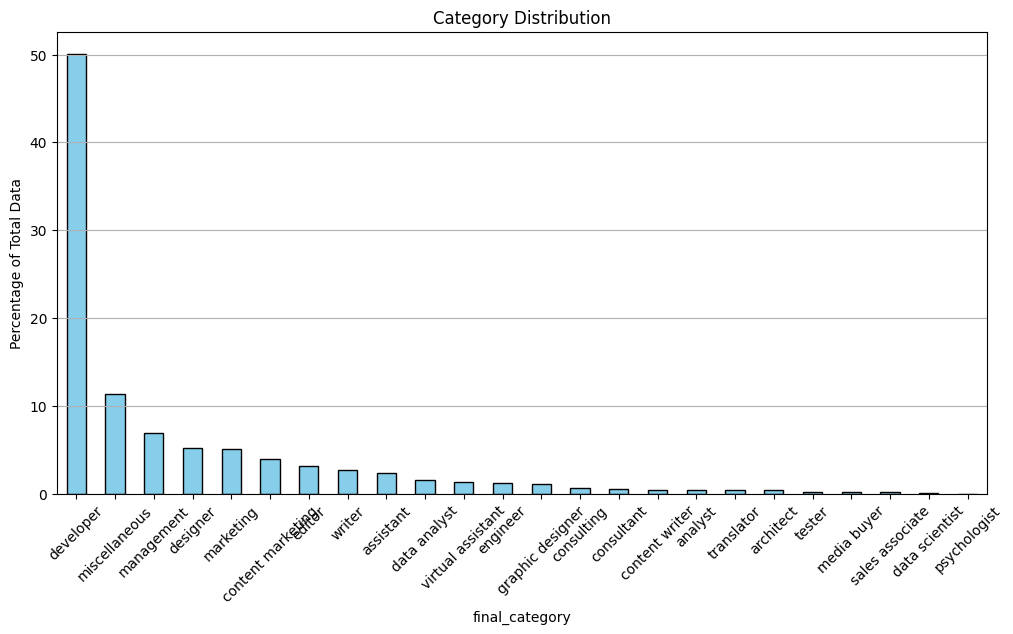

In [172]:
# Compute percentage distribution
category_counts = df['final_category'].value_counts(normalize=True) * 100

# Plot distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Category Distribution")
plt.ylabel("Percentage of Total Data")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Reduce "Miscellaneous" count to match other job categories:

-This ensures a more even category distribution without excessive bias.

In [173]:
from sklearn.utils import resample

# Separate dominant and other categories
misc_jobs = df[df['final_category'] == 'miscellaneous']
other_jobs = df[df['final_category'] != 'miscellaneous']

# Downsample "Miscellaneous"

misc_sampled = resample(misc_jobs, replace=False,
                         n_samples=min(len(misc_jobs), int(len(other_jobs) * 0.5)),
                         random_state=42)

# Merge with other categories
df_balanced = pd.concat([misc_sampled, other_jobs])


In [174]:
df_balanced['final_category'].value_counts()

,count
final_category,
developer,122623
miscellaneous,27851
management,16942
designer,12680
marketing,12478
content marketing,9797
editor,7845
writer,6603
assistant,5917


In [175]:
category_mapping = {
    'data scientist': 'data analyst',
    'psychologist': 'consulting',
    'media buyer': 'marketing',
    'sales associate': 'marketing'
}
df['final_category'] = df['final_category'].replace(category_mapping)


In [176]:
df['final_category'] = df['final_category'].replace(category_mapping)

In [177]:
df['final_category'].value_counts()

,count
final_category,
developer,122623
miscellaneous,27851
management,16942
marketing,13466
designer,12680
content marketing,9797
editor,7845
writer,6603
assistant,5917


-------------------------------------------------

use..Auto encoders

In [178]:
df.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'has_hourly', 'has_budget',
       'month_year', 'category', 'generated_category', 'final_category'],
      dtype='object')

In [179]:
df.to_csv('/content/drive/MyDrive/Project_8/pre_processed_data.csv', index=False)

In [180]:
Dataset.columns

Index(['title', 'link', 'published_date', 'is_hourly', 'hourly_low',
       'hourly_high', 'budget', 'country', 'has_hourly', 'has_budget',
       'month_year', 'category'],
      dtype='object')

--------------------------------------------

In [181]:
# Convert published_date to datetime
df["published_date"] = pd.to_datetime(df["published_date"])

# Aggregate job postings by final category & month-year
job_demand_df = df.groupby(["month_year", "final_category"]).size().unstack(fill_value=0)

# Convert month_year to a datetime index
job_demand_df.index = job_demand_df.index.to_timestamp()

print(job_demand_df.head())

final_category  analyst  architect  assistant  consultant  consulting  \
month_year                                                              
2023-11-01            0          1          0           0           0   
2023-12-01            0          0          0           0           0   
2024-01-01            0          0          5           1           1   
2024-02-01          494        415       2551         577         679   
2024-03-01          610        625       3361         804         937   

final_category  content marketing  content writer  data analyst  designer  \
month_year                                                                  
2023-11-01                      0               0             0         0   
2023-12-01                      0               1             0         0   
2024-01-01                      0               0             1         4   
2024-02-01                   4130             552          1567      5259   
2024-03-01                

In [182]:
scaler = MinMaxScaler()
job_demand_scaled = scaler.fit_transform(job_demand_df)

In [183]:
print("Scaled Shape:", job_demand_scaled.shape)  # Check dimensions

Scaled Shape: (5, 20)


In [184]:
# Define input size
input_dim = job_demand_scaled.shape[1]

In [185]:
# Input layer
input_layer = Input(shape=(input_dim,))

In [186]:
# Encoding layers
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)

In [187]:
# Decoding layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

In [188]:
# Create autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [189]:
# Train autoencoder
autoencoder.fit(job_demand_scaled, job_demand_scaled, epochs=30, batch_size=16)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3049
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2895
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2753
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2631
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2512
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2394
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2288
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2188
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2086
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1988
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1894
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1802
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1712
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1626
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1543
Epoch 16/30
1/1 ━━━━━━━━━━━━━━━━━━━━

In [190]:
# Create feature extractor model
encoder = Model(input_layer, encoded)

In [191]:
# Extract compressed job demand features
job_demand_encoded = encoder.predict(job_demand_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [192]:
# Use encoded features for RNN training
X_train = []
y_train = []
sequence_length = 3 # Number of past time steps for prediction

In [193]:
for i in range(len(job_demand_encoded) - sequence_length):
    X_train.append(job_demand_encoded[i : i + sequence_length])
    y_train.append(job_demand_encoded[i + sequence_length])

In [194]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [195]:
print(X_train.shape, y_train.shape)  # Check input shape for RNN

(2, 3, 32) (2, 32)


In [196]:
# Perform 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [197]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (1, 3, 32) (1, 32)
Testing data shape: (1, 3, 32) (1, 32)


In [198]:
model = Sequential([
    Input(shape=(sequence_length, job_demand_encoded.shape[1])),
    LSTM(100, return_sequences=True),  # Increased units
    Dropout(0.3),  # Higher dropout to prevent overfitting
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    LSTM(50),  # Final LSTM layer
    Dropout(0.2),
    Dense(job_demand_encoded.shape[1], activation="linear")
])

In [199]:
# Compile model
model.compile(optimizer="adam", loss="mse")

In [200]:
# Train model with optimized features
model.fit(X_train, y_train, epochs=30, batch_size=16)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.2808
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2790
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2770
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2751
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.2737
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2714
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2692
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2655
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2664
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2599
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.2617
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2525
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.2525
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2457
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2420
Epoch 16/30
1/1 ━━━━━━━━━━━━━━━━━━

In [201]:
# Generate predictions using the trained model
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


In [202]:
print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)

y_pred shape: (1, 32)
y_test shape: (1, 32)


In [203]:
print("Scaler expected shape:", scaler.n_features_in_)

Scaler expected shape: 20


In [204]:
scaler = MinMaxScaler()  # Reinitialize scaler
scaler.fit(y_train)  # Fit on training data, ensuring 32 features

MinMaxScaler()

In [205]:
# Inverse transform predictions to match original scale
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)  # Ground truth values

In [206]:
print("Corrected y_pred shape:", y_pred_actual.shape)
print("Corrected y_test shape:", y_test_actual.shape)

Corrected y_pred shape: (1, 32)
Corrected y_test shape: (1, 32)


In [207]:
mae = mean_absolute_error(y_test_actual.flatten(), y_pred_actual.flatten())
rmse = np.sqrt(mean_squared_error(y_test_actual.flatten(), y_pred_actual.flatten()))

print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")


Test MAE: 0.18
Test RMSE: 0.32


In [208]:
features = job_demand_encoded.shape[1]  # Get the number of features

In [209]:
from tensorflow.keras.layers import GRU

model = Sequential([
    Input(shape=(sequence_length, features)),
    GRU(150, return_sequences=True),
    Dropout(0.3),
    GRU(150),
    Dropout(0.3),
    Dense(features, activation="sigmoid")
])

In [210]:
model.compile(optimizer="adam", loss="mse")

In [211]:
model.fit(X_train, y_train, epochs=30, batch_size=16)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2761
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2745
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2727
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2708
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2689
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2654
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2631
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2604
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2591
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.2530
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2520
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2417
Epoch 13/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2337
Epoch 14/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2188
Epoch 15/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2224
Epoch 16/30
1/1 ━━━━━━━━━━━━━━━━━━━━

In [212]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


In [213]:
# Convert predictions into a probability scale (0 to 1)
y_pred_prob = 1 / (1 + np.exp(-y_pred))

In [214]:
# Apply thresholding to classify jobs as "high demand"
high_demand_jobs = (y_pred_prob > 0.7).astype(int)

In [215]:
print(high_demand_jobs[:10])  # Shows binary classification output

[[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0]]


In [216]:
# Inverse transform predictions to match original scale
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

In [217]:
print("Predicted Demand Trends:", y_pred_actual.flatten()[:10])

Predicted Demand Trends: [0.05695105 0.15251073 0.06838409 0.02021858 0.02359467 2.4874122
 0.01996295 0.02026215 0.00582951 0.10433844]


In [218]:
mae = mean_absolute_error(y_test_actual.flatten(), y_pred_actual.flatten())
rmse = np.sqrt(mean_squared_error(y_test_actual.flatten(), y_pred_actual.flatten()))

print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")

Test MAE: 0.15
Test RMSE: 0.30


In [219]:
# Get the category labels from your dataset
categories = job_demand_df.columns.tolist()  # Extract list of job categories
print("Available Categories:", categories)

Available Categories: ['analyst', 'architect', 'assistant', 'consultant', 'consulting', 'content marketing', 'content writer', 'data analyst', 'designer', 'developer', 'editor', 'engineer', 'graphic designer', 'management', 'marketing', 'miscellaneous', 'tester', 'translator', 'virtual assistant', 'writer']


In [220]:
print("Total Categories:", len(categories))  # Check the number of job categories
print("Predicted Index Values:", np.argmax(y_pred_actual, axis=1))  # Check predicted indices

Total Categories: 20
Predicted Index Values: [5]


In [221]:
predicted_categories = [categories[min(i, len(categories) - 1)] for i in np.argmax(y_pred_actual, axis=1)]

In [222]:
print("Predicted Job Categories:", predicted_categories[:10])

Predicted Job Categories: ['content marketing']


In [223]:
model.save("job_demand_forecasting_model.keras")  # Updated file extension

In [224]:
loaded_model = load_model("job_demand_forecasting_model.keras")

loaded_model.summary()  # Check architecture after loading

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 3, 150)         │        82,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 150)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 150)            │       135,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         4,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 670,598 (2.56 MB)

 Trainable params: 223,532 (873.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 447,066 (1.71 MB)

------------------------------------------